In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/central-tendency-and-spread/Central-Tendency-and-Spread.xlsx


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('/kaggle/input/central-tendency-and-spread/Central-Tendency-and-Spread.xlsx',header = None)
df.head(10)


,0,1,2
0,NaN,NaN,NaN
1,NaN,Comlaint Type,# Time to resolve complain (minutes)
2,NaN,Out of Stock Product,72
3,NaN,Out of Stock Product,71
4,NaN,Lack of Follow Up,96
5,NaN,Lack of Follow Up,73
6,NaN,Poor Product Quality,125
7,NaN,Asking for Refund,54
8,NaN,Out of Stock Product,89
9,NaN,Asking for Refund,66


In [4]:
df.columns = ['column1', 'Complaint Type', '#Time to resolve complain (minutes)']
df.head(10)

,column1,Complaint Type,#Time to resolve complain (minutes)
0,NaN,NaN,NaN
1,NaN,Comlaint Type,# Time to resolve complain (minutes)
2,NaN,Out of Stock Product,72
3,NaN,Out of Stock Product,71
4,NaN,Lack of Follow Up,96
5,NaN,Lack of Follow Up,73
6,NaN,Poor Product Quality,125
7,NaN,Asking for Refund,54
8,NaN,Out of Stock Product,89
9,NaN,Asking for Refund,66


In [5]:
df.drop(columns=['column1'],axis=1, inplace = True)
df.head(10)

,Complaint Type,#Time to resolve complain (minutes)
0,NaN,NaN
1,Comlaint Type,# Time to resolve complain (minutes)
2,Out of Stock Product,72
3,Out of Stock Product,71
4,Lack of Follow Up,96
5,Lack of Follow Up,73
6,Poor Product Quality,125
7,Asking for Refund,54
8,Out of Stock Product,89
9,Asking for Refund,66


In [6]:
df.drop([0, 1], inplace = True)
df.head(10)

,Complaint Type,#Time to resolve complain (minutes)
2,Out of Stock Product,72
3,Out of Stock Product,71
4,Lack of Follow Up,96
5,Lack of Follow Up,73
6,Poor Product Quality,125
7,Asking for Refund,54
8,Out of Stock Product,89
9,Asking for Refund,66
10,Lack of Follow Up,54
11,Poor Product Quality,141


In [7]:
df.shape

(256, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 2 to 257
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Complaint Type                       256 non-null    object
 1   #Time to resolve complain (minutes)  256 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [9]:
df['#Time to resolve complain (minutes)'] = pd.to_numeric(df['#Time to resolve complain (minutes)'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 2 to 257
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Complaint Type                       256 non-null    object
 1   #Time to resolve complain (minutes)  256 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [11]:
print(df.isnull().sum())

Complaint Type                         0
#Time to resolve complain (minutes)    0
dtype: int64


In [12]:
df['Complaint Type'].unique()

array(['Out of Stock Product', 'Lack of Follow Up',
       'Poor Product Quality', 'Asking for Refund'], dtype=object)

In [13]:
# import graph library
import matplotlib.pyplot as plt

In [14]:
#summarize points by Complaint Type
df.groupby('Complaint Type')['#Time to resolve complain (minutes)'].describe()

,count,mean,std,min,25%,50%,75%,max
Complaint Type,,,,,,,,
Asking for Refund,55.0,66.254545,9.215965,50.0,58.00,68.0,74.0,80.0
Lack of Follow Up,56.0,83.767857,19.332489,52.0,65.75,84.5,98.5,119.0
Out of Stock Product,77.0,83.259740,21.298877,51.0,65.00,85.0,99.0,120.0
Poor Product Quality,68.0,132.691176,40.980978,2.0,108.50,133.0,164.0,192.0


In [15]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
#Time to resolve complain (minutes),256.0,92.847656,36.011058,2.0,66.0,85.5,111.0,192.0


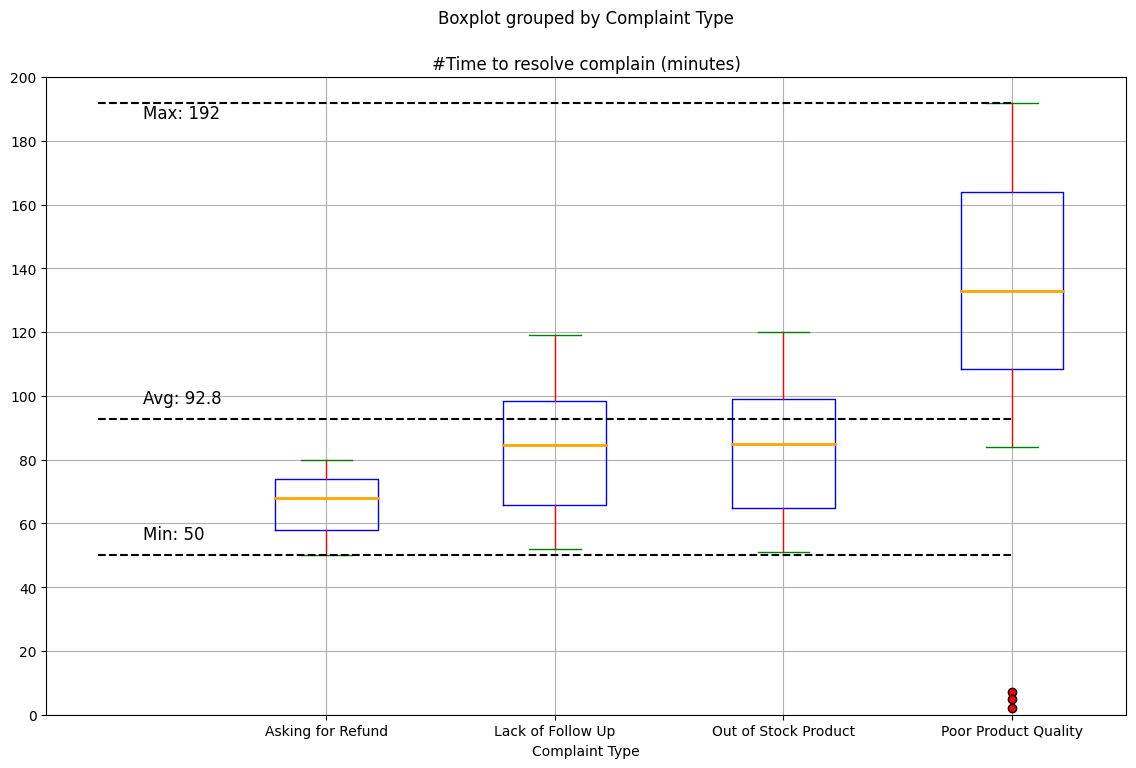

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#df.boxplot(column='#Time to resolve complain (minutes)', by = 'Complaint Type', figsize=(20,15))

# Create the boxplot with color customization
df.boxplot(
    column='#Time to resolve complain (minutes)',by='Complaint Type',
    figsize=(13.5, 8.5),
    boxprops={"color": "blue"},  # Set box color (adjust as needed)
    whiskerprops={"color": "red"},  # Set whisker color
    capprops={"color": "green"},  # Set cap color
    medianprops={"color": "orange", "linewidth": 2},  # Set median color and linewidth
    flierprops={"markerfacecolor": "red", "marker": "o"},  # Set flier color and marker
)

# Access the current axes
ax = plt.gca()

# Horizontal line at y=92.8
horizontal_line_y = 92.8
ax.hlines(y=horizontal_line_y, xmin=0, xmax=len(df['Complaint Type'].unique()), linestyle='--', color='black')
horizontal_line_y_min = 50
ax.hlines(y=horizontal_line_y_min, xmin=0, xmax=len(df['Complaint Type'].unique()), linestyle='--', color='black')
horizontal_line_y_max = 192
ax.hlines(y=horizontal_line_y_max, xmin=0, xmax=len(df['Complaint Type'].unique()), linestyle='--', color='black')

# Add text to indicate the line value
ax.text(0.2, horizontal_line_y + 5, f"Avg: {horizontal_line_y}", fontsize=12)
ax.text(0.2, horizontal_line_y_min + 5, f"Min: {horizontal_line_y_min}", fontsize=12)
ax.text(0.2, horizontal_line_y_max - 5, f"Max: {horizontal_line_y_max}", fontsize=12)

# Set the y-axis limits and ticks
ax.set_ylim(0, 200)
ax.set_yticks(range(0, 201, 20))  # Create ticks from 0 to 200 with a step of 20

plt.show()



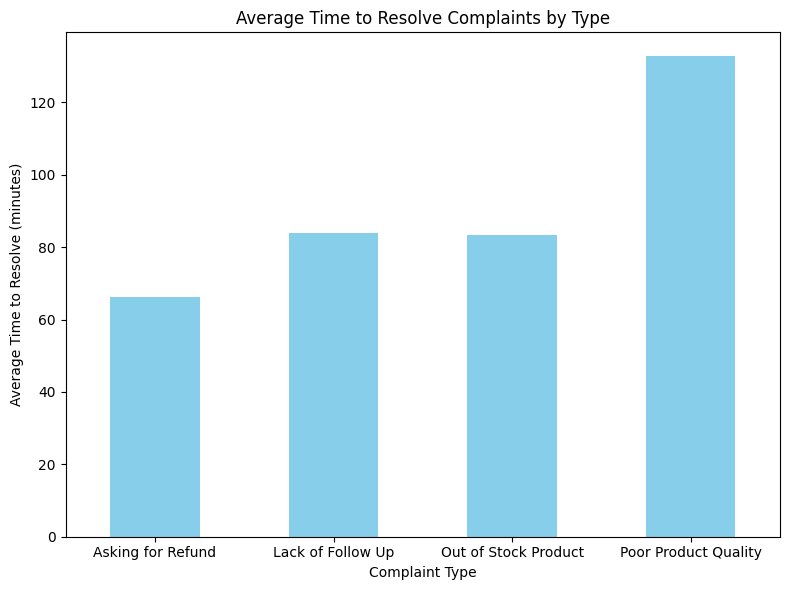

In [17]:
# Create a bar chart
plt.figure(figsize=(8, 6))
df.groupby('Complaint Type')['#Time to resolve complain (minutes)'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Complaint Type')
plt.ylabel('Average Time to Resolve (minutes)')
plt.title('Average Time to Resolve Complaints by Type')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [21]:
var50 = df[df['#Time to resolve complain (minutes)'] == 50].groupby('Complaint Type').size()
print(var50)

Complaint Type
Asking for Refund    2
dtype: int64


In [20]:
mins192 = df[df['#Time to resolve complain (minutes)'] == 192].groupby('Complaint Type').size()
print(mins192)

Complaint Type
Poor Product Quality    1
dtype: int64


In [23]:
data_poor_quality = df[df['Complaint Type'] == 'Poor Product Quality']['#Time to resolve complain (minutes)']

# Calculate Q1, Q3, dan IQR
Q1 = data_poor_quality.quantile(0.25)
Q3 = data_poor_quality.quantile(0.75)
IQR = Q3 - Q1

# Define Outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data without outlier
data_filtered = data_poor_quality[(data_poor_quality >= lower_bound) & (data_poor_quality <= upper_bound)]

# Cari waktu penyelesaian tercepat yang baru
real_min = data_filtered.min()

print(f'Real Min: {real_min} mins')

Real Min: 84 mins
